In [53]:
import yfinance as yf

import mplfinance as mpl

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.dates as mpl_dates 

from datetime import date, timedelta

import pandas as pd



Start = date.today() - timedelta(365)  #Creating a datetime clamp over the past year
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')

def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start, #Creating a function that finds the Adjusted closing price of an asset over the past year 
      end=End)['Adj Close'])     
    return Asset

tickers = ['MSFT','AMZN','AAPL','NVDA']




MICROSOFT = closing_price('MSFT')      
AMAZON = closing_price('AMZN') #Calling the function for each of the 4 largest companies by weight in the S&P500
NVIDIA = closing_price('NVDA')
APPLE = closing_price('AAPL')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


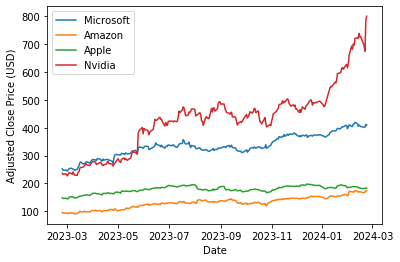

In [54]:
plt.plot(MICROSOFT, label='Microsoft')

plt.plot(AMAZON, label='Amazon')

plt.plot(APPLE, label='Apple')          #Plotting the companies Adjusted Close value accross time

plt.plot(NVIDIA, label='Nvidia')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.show()

In [55]:
print(MICROSOFT.iloc[0])

Adj Close    252.69606
Name: 2023-02-23 00:00:00, dtype: float64


In [56]:

def calculate_percentage_increase(old_value, new_value):
    try:
        percentage_increase = ((new_value - old_value) / abs(old_value)) * 100
        return percentage_increase
    except ZeroDivisionError:
        # Handle the case where old_value is 0 to avoid division by zero
        return float('inf')

percentageIncreases = [calculate_percentage_increase(MICROSOFT["Adj Close"].iloc[0], MICROSOFT["Adj Close"].iloc[-1]), calculate_percentage_increase(AMAZON["Adj Close"].iloc[0], AMAZON["Adj Close"].iloc[-1]), calculate_percentage_increase(APPLE["Adj Close"].iloc[0], APPLE["Adj Close"].iloc[-1]), calculate_percentage_increase(NVIDIA["Adj Close"].iloc[0], NVIDIA["Adj Close"].iloc[-1])]


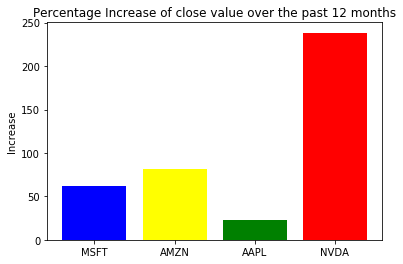

In [57]:
fig, ax = plt.subplots()



bar_colors = ['blue', 'yellow', 'green', 'red']

ax.bar(tickers, percentageIncreases, label=tickers, color=bar_colors)

ax.set_ylabel('Increase')
ax.set_title('Percentage Increase of close value over the past 12 months')

plt.show()
